In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


In [2]:
np.random.seed(123)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


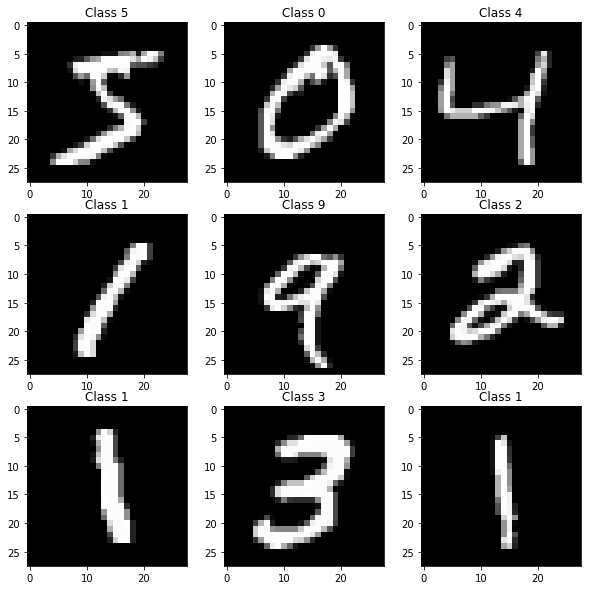

In [5]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Class {}'.format(y_train[i]))

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [11]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 94us/step - loss: 0.2512 - val_loss: 0.1048
Epoch 2/4
60000/60000 [==============================] - 5s 91us/step - loss: 0.1025 - val_loss: 0.0808
Epoch 3/4
60000/60000 [==============================] - 5s 91us/step - loss: 0.0736 - val_loss: 0.0719
Epoch 4/4
60000/60000 [==============================] - 5s 90us/step - loss: 0.0556 - val_loss: 0.0712


In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

0.07122428064458364


In [13]:
predicted_classes = model.predict_classes(X_test)

In [14]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

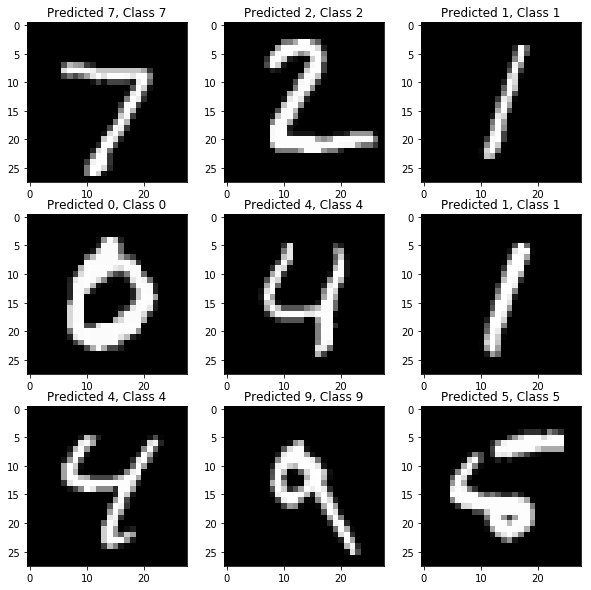

In [19]:
plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

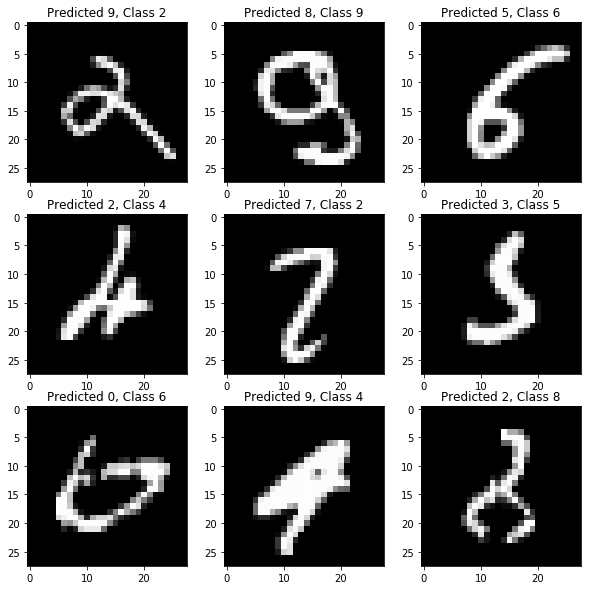

In [20]:
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))